In [1]:
using Revise
using SDDP
using Random
using Plots
using Gurobi
import Statistics
const GRB_ENV = Gurobi.Env()
optimizer=() -> Gurobi.Optimizer(GRB_ENV)

Set parameter Username
Set parameter LicenseID to value 2658456
Academic license - for non-commercial use only - expires 2026-04-28


#11 (generic function with 1 method)

In [2]:
TimeHorizon = 12
graph=SDDP.InfiniteLinearGraph(TimeHorizon);

In [3]:
function msppy_hydro_thermal_builder(sp::Model, node::Int, discount_factor::Float64)
    thermal_ub = Array{Float64, 2}[
        [657 1350 36 250 250 28 529 44 255 235 386 386 145 226 131 87 204 923 923 400 100 200 169 386 28 200 272 30 168 440 400 258 258 258 64 340 1058 1058 10 197 175 206 54],
        [66 485 485 350 161 72 4 20 100 132 262 363 24 126 320 20 640],
        [13 11 32 11 347 152 150 13 15 220 220 13 15 138 347 149 149 15 102 15 168 13 13 103 136 53 66 186 50 156 171 533 323],
        [166 166]
    ]
    thermal_lb = Array{Float64,2}[
        [520.0  1080.0  0.0  59.3  27.1  0.0  0.0  0.0  219.78  199.99  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  399.99  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  71.7  28.8  0.0  132.98  0.0  0.0  0.0],
        [0.0 0.0 0.0 210.0 0.0 27.0 0.0 9.56 25.0 79.46 147.54 228.02 0.0 49.66 105.0 5.0 0.0],
        [0.0 0.0 0.0 0.0 0.7 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 223.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 348.8 0.0],
        [0 0]
    ]
    thermal_obj = Array{Float64, 2}[
        [21.49 18.96 937.0 194.79 222.22 140.58 6.27 505.92 0.01 112.46 159.97 250.87 550.66 188.89 645.3 150.0 145.68 274.54 253.83 37.8 51.93 90.69 131.68 317.98 152.8 470.34 317.98 523.35 730.54 310.41 730.54 101.33 140.34 292.49 610.33 487.56 122.65 214.48 1047.38 0.01 329.57 197.85 733.54],
        [564.57 219.0 219.0 50.47 541.93 154.1 180.51 218.77 189.54 143.04 142.86 116.9 780.0 115.9 115.9 248.31 141.18],
        [464.64 464.64 455.13 464.64 834.35 509.86 509.86 464.64 464.64 185.09 492.29 464.64 464.64 188.15 82.34 329.37 329.37 464.64 464.64 464.64 317.19 464.64 464.64 678.03 559.39 611.57 611.56 204.43 325.67 678.03 329.2 70.16 287.83],
        [329.56 329.56]
    ]
    # N_THERMAL = [43, 17, 33, 2]
    N_THERMAL = [0,0,0,0]
    # Sanity check on the dimensions of the thermal data.
    @assert N_THERMAL <= length.(thermal_obj) == length.(thermal_lb) ==
        length.(thermal_ub)
    hydro_ub = [45414.3, 13081.5, 9900.9, 7629.9]
    storedEnergy_initial = [59419.3000, 5874.9000, 12859.2000, 5271.5000]
    storedEnergy_ub = [200717.6, 19617.2, 51806.1, 12744.9]
    exchange_ub =  Array{Float64, 2}[
        [0	7379	1000	0	4000],
        [5625	0	0	0	0],
        [600	0	0	0	2236],
        [0	0	0	0	99999],
        [3154	0	3951	3053	0]
    ]
    deficit_obj = [1142.8, 2465.4, 5152.46, 5845.54]
    deficit_ub = [0.05, 0.05, 0.1, 0.8]
    demand =  Array{Float64, 2}[
        [45515  11692  10811  6507],
        [46611  11933  10683  6564],
        [47134  12005  10727  6506],
        [46429  11478  10589  6556],
        [45622  11145  10389  6645],
        [45366  11146  10129  6669],
        [45477  11055  10157  6627],
        [46149  11051  10372  6772],
        [46336  10917  10675  6843],
        [46551  11015  10934  6815],
        [46035  11156  11004  6871],
        [45234  11297  10914  6701]
    ]
    scenarios =[
        [[56896.8, 56451.95, 65408.16, 46580.39, 54645.97, 36916.81, 63301.09, 53645.87, 57959.52, 54200.71, 48448.49, 45010.7, 81105.82, 35019.44, 41229.43, 80514.3, 51163.61, 53329.75, 50702.92, 42240.62, 55109.13, 33675.91, 25129.81, 29190.4, 36301.34, 37791.77, 58268.57, 39743.58, 62565.51, 49713.71, 72890.69, 45726.42, 66364.28, 37928.66, 62789.08, 73042.18, 66665.7, 52993.58, 31559.83, 56002.39, 30617.05, 40899.73, 54433.46, 62568.66, 51341.31, 40927.71, 73413.29, 69900.43, 66850.87, 76182.63, 72077.01, 84213.88, 64555.38, 72950.98, 53957.75, 53046.27, 47082.36, 58093.71, 80492.3, 47948.51, 60261.41, 47993.66, 64712.19, 52583.97, 55161.47, 92429.3, 43304.33, 58739.64, 55468.74, 40817.11, 63727.25, 60146.67, 47266.3, 67074.83, 46916.31, 95400.9, 38313.51, 54999.69, 71369.67, 76664.21, 73633.5, 46999.32], [86488.31, 61922.34, 51128.33, 37113.35, 72711.15, 29950.27, 43981.97, 45561.95, 57663.45, 75154.55, 38353.62, 51036.28, 73890.02, 47726.22, 71175.26, 62788.22, 61001.38, 57412.95, 72857.05, 65235.58, 67209.56, 50100.68, 26092.14, 44292.32, 27535.59, 25749.92, 62387.31, 57549.88, 50654.11, 59386.44, 77049.72, 60836.23, 59055.5, 61202.37, 78078.5, 78991.29, 71465.94, 47197.58, 37602.63, 57691.13, 20504.58, 58197.41, 54655.96, 45842.69, 48096.68, 47690.98, 71610.48, 47429.75, 89520.11, 92447.91, 47928.35, 71909.26, 47626.61, 70620.4, 50034.14, 59045.22, 57525.75, 61449.32, 41790.65, 65572.44, 86433.67, 68600.8, 51672.08, 83801.3, 41190.08, 73474.32, 53990.6, 50665.03, 67756.3, 40550.35, 70939.21, 61771.53, 71467.42, 59049.86, 49152.53, 91724.84, 63801.6, 66431.93, 59988.07, 50373.33, 49701.05, 56717.86], [88646.94, 50742.1, 40424.25, 35392.72, 61323.17, 53709.93, 39542.99, 40185.12, 34083.82, 68610.98, 35718.51, 62628.01, 69692.0, 51495.85, 62809.69, 70220.74, 93477.21, 59883.76, 53172.92, 56491.72, 65725.0, 77701.54, 32542.38, 29444.29, 29070.61, 37872.92, 63481.8, 47988.85, 52728.54, 63441.32, 78376.69, 60248.39, 41110.96, 37183.08, 83982.68, 72883.91, 61051.15, 52788.25, 33315.79, 58386.71, 25463.7, 52687.47, 48144.5, 63161.07, 36378.46, 48314.32, 39789.9, 54422.3, 57184.51, 62386.9, 43430.01, 85259.92, 39652.55, 71335.51, 47263.74, 47293.6, 62981.06, 54515.96, 43462.15, 68127.72, 55948.83, 56153.76, 61042.16, 52448.52, 54230.46, 57821.91, 55790.78, 59436.74, 62295.26, 38312.37, 49257.88, 48780.76, 62710.63, 57188.43, 59325.77, 51971.26, 64294.7, 47939.56, 54351.96, 86775.98, 37212.98, 49482.34], [64581.71, 35954.27, 34627.46, 27179.93, 54644.39, 37115.42, 35188.12, 30857.44, 28957.8, 38145.67, 33851.76, 45004.41, 41888.5, 32537.77, 61618.73, 45492.33, 57661.37, 40768.91, 36675.8, 39891.03, 46600.38, 41833.13, 35331.16, 24828.12, 28963.44, 26392.81, 57277.26, 40083.16, 39037.46, 40510.26, 49649.42, 35895.16, 28420.51, 27653.31, 52072.86, 47120.75, 42126.42, 31221.08, 23267.58, 33811.21, 21492.44, 37357.77, 49257.71, 56164.65, 34749.3, 38150.11, 44706.32, 35701.34, 40448.63, 52746.17, 40067.9, 62428.88, 42785.49, 52326.19, 32913.93, 41161.01, 44123.86, 36565.93, 35065.17, 68823.2, 50669.57, 47121.6, 43602.65, 47373.13, 36659.8, 45289.32, 45618.72, 34198.26, 38268.72, 28944.83, 31516.06, 42862.66, 48390.75, 37943.12, 50501.94, 35807.24, 52671.46, 49262.74, 46138.46, 55543.29, 32317.51, 51632.89], [43078.74, 27000.91, 24456.72, 19080.88, 34731.77, 24512.01, 27671.57, 25654.34, 24788.09, 29380.5, 18923.09, 30031.07, 26936.13, 22540.12, 34858.01, 30581.26, 34635.02, 24931.13, 27008.57, 27616.21, 28566.65, 25574.69, 21342.69, 30732.45, 17083.18, 29745.45, 34161.48, 32373.28, 25060.83, 30213.42, 39757.11, 26435.75, 20601.37, 21707.83, 45436.42, 34622.49, 28792.77, 22897.49, 17471.04, 24573.34, 18395.36, 23937.22, 31238.07, 34468.55, 23514.07, 29321.19, 29379.36, 28537.54, 34587.4, 35207.58, 27619.03, 39712.36, 35169.64, 37162.41, 31130.86, 39983.01, 35946.54, 28366.52, 29951.98, 40186.78, 50571.36, 32563.19, 32207.74, 34805.16, 26620.61, 32791.29, 35023.07, 26037.19, 25014.17, 22937.9, 28856.74, 27047.64, 37864.66, 31422.07, 29368.14, 29439.74, 36583.08, 31676.46, 29744.25, 34050.76, 30086.86, 29348.76], [32150.18, 25285.24, 19099.7, 14173.57, 26184.86, 17752.6, 23148.61, 20780.68, 20168.94, 21178.59, 16560.55, 29365.82, 23855.04, 17234.34, 26267.7, 26141.76, 26250.48, 22090.39, 21541.84, 20595.83, 23051.97, 22945.63, 17305.82, 23164.67, 18172.0, 32394.56, 25360.63, 28995.24, 20275.84, 24027.02, 27505.81, 22703.44, 17584.25, 16834.37, 30722.54, 25847.39, 26649.2, 18519.69, 18348.12, 20415.98, 19592.53, 19778.88, 25505.35, 29621.4, 18642.25, 33204.9, 25960.33, 27167.15, 26294.99, 28241.02, 25324.0, 39552.75, 24145.72, 28054.54, 22726.21, 34494.79, 32289.77, 23823.56, 23255.09, 29651.66, 34628.41, 31515.82, 28821.56, 25045.89, 21037.21, 39653.57, 26762.9, 24243.85, 21432.57, 20539.73, 20990.06, 22862.46, 33766.52, 28192.96, 23389.44, 24328.4, 28371.8, 25816.19, 23648.83, 28276.29, 38658.88, 38515.33], [25738.04, 19913.2, 16790.67, 11860.9, 19927.38, 14706.5, 16354.45, 18619.35, 16549.77, 16631.69, 15759.09, 23062.33, 18597.07, 14480.2, 24962.54, 26915.97, 22787.45, 17159.91, 17111.7, 17576.81, 19086.23, 17400.83, 13620.22, 15434.43, 15196.4, 21098.2, 28206.5, 22466.48, 16221.58, 20073.41, 21229.3, 17647.23, 14939.49, 15664.9, 27837.17, 21366.45, 21327.28, 15599.11, 13938.13, 19611.86, 17830.94, 21998.19, 23299.17, 23916.43, 18258.67, 26281.64, 20098.85, 24116.7, 22630.54, 26739.58, 19458.87, 38487.54, 20195.47, 23486.83, 19228.76, 24159.73, 21535.23, 21521.31, 24639.11, 24871.76, 26304.24, 23268.23, 24487.15, 23871.07, 18284.17, 28291.17, 20945.59, 22369.94, 19811.22, 17389.8, 18273.11, 19522.99, 27882.67, 21450.9, 20552.6, 23607.35, 21404.13, 28296.36, 20808.6, 24527.67, 26593.14, 31033.18], [20606.05, 16801.72, 14192.07, 9904.96, 19833.32, 13891.48, 13870.17, 16287.23, 13383.61, 13732.02, 15122.03, 16335.75, 15380.33, 12027.54, 16431.03, 18109.8, 19971.19, 16989.68, 14138.87, 13614.16, 15974.7, 14098.04, 11590.2, 11597.36, 11400.63, 23751.08, 25079.71, 16940.29, 15396.49, 17698.38, 17329.15, 15414.73, 13043.51, 13406.36, 21583.89, 17619.21, 16981.52, 15169.28, 11339.97, 14285.46, 13204.94, 19390.34, 18399.97, 18752.41, 14739.07, 25994.83, 15773.26, 18723.76, 21783.59, 21137.32, 17354.26, 26962.54, 20638.69, 19665.77, 22455.74, 18405.64, 17890.93, 25762.9, 22246.87, 19802.24, 22481.12, 20835.04, 19030.91, 16927.84, 16072.49, 21382.07, 22745.14, 15799.05, 18981.85, 14811.25, 16522.04, 15604.83, 19421.44, 17115.78, 17471.55, 19105.94, 22977.11, 24641.57, 16121.9, 24298.46, 17342.35, 19248.41], [22772.16, 15034.4, 13741.74, 11835.56, 18289.43, 17056.12, 12040.76, 14448.98, 12275.62, 12255.37, 17561.96, 16624.51, 14661.5, 10510.08, 14125.62, 14929.4, 24107.77, 13659.7, 12283.03, 11761.84, 13469.6, 14120.36, 12719.73, 10034.25, 11259.79, 16559.39, 31762.07, 20615.73, 12660.14, 13992.03, 15396.42, 16368.64, 11565.03, 10941.74, 17168.12, 17513.5, 16020.86, 13917.48, 9500.66, 19390.18, 12671.12, 18785.94, 18905.01, 16947.82, 12242.09, 29837.37, 18936.32, 19703.51, 27774.12, 22748.74, 14303.81, 22450.11, 22886.6, 18904.29, 17416.04, 18858.4, 15528.36, 26579.42, 26121.59, 17212.57, 28153.06, 23376.16, 15224.49, 15583.27, 21217.4, 20427.43, 23452.75, 16741.52, 30198.36, 15672.8, 17535.92, 15052.75, 15273.23, 19793.78, 18612.71, 13365.51, 16452.14, 32081.91, 13964.53, 16749.78, 14773.73, 17116.17], [23767.55, 22347.14, 17339.43, 12925.78, 34902.46, 14124.93, 21610.55, 18611.16, 13874.47, 14368.61, 21513.16, 18401.39, 23147.1, 11673.81, 17407.93, 19596.07, 25084.21, 15580.89, 14990.72, 17952.25, 15543.08, 16393.5, 18436.23, 11431.06, 11965.3, 14726.15, 22453.76, 21456.65, 14941.06, 16395.21, 14685.41, 25111.82, 13330.21, 17590.17, 30383.6, 23226.29, 15479.99, 17075.9, 18972.43, 21841.24, 18849.04, 42223.31, 26037.88, 20118.15, 22821.5, 30995.92, 18894.75, 18612.61, 25497.0, 21882.33, 26321.83, 32933.12, 21215.67, 18142.29, 15945.98, 21042.48, 20583.84, 20560.02, 26845.0, 26617.84, 34139.15, 29715.86, 16112.45, 25927.78, 22152.14, 25137.8, 33871.69, 13858.76, 18798.82, 22151.35, 13284.47, 15851.55, 21942.79, 23406.24, 26217.27, 13559.07, 21131.23, 37332.1, 22115.41, 25199.08, 15185.71, 24053.0], [25831.89, 25004.76, 18503.66, 13594.84, 26176.69, 18411.58, 35511.48, 22441.18, 24967.68, 29859.02, 27124.93, 25773.5, 31708.34, 21600.95, 29777.43, 22391.65, 24543.99, 22869.29, 21100.25, 30429.5, 16296.95, 24523.57, 22523.1, 15501.59, 18872.23, 22472.39, 28037.37, 24399.38, 22887.14, 26654.33, 22534.09, 26281.36, 20988.75, 24865.56, 34692.72, 35360.85, 27010.2, 20988.36, 38522.5, 24500.92, 25310.61, 43420.75, 35193.52, 21707.73, 31387.95, 40779.06, 28225.77, 30537.62, 33284.42, 27321.85, 47896.08, 38532.69, 22792.1, 24029.92, 17271.2, 29198.04, 26072.51, 27553.75, 24614.4, 22967.04, 46357.71, 21313.7, 23953.59, 25345.95, 36517.51, 33685.87, 28944.96, 20108.6, 29306.63, 26133.38, 22837.29, 21655.14, 26349.73, 29076.36, 29204.23, 23931.0, 26396.78, 37931.62, 29379.11, 27410.53, 23276.7, 22846.94], [38566.5, 48755.6, 36070.84, 33700.23, 32033.65, 34416.72, 53788.68, 40579.16, 37058.66, 34210.67, 40816.63, 41600.78, 39227.88, 27408.38, 59081.29, 28648.63, 44644.33, 48005.17, 34140.7, 43351.87, 25642.92, 28734.88, 33971.28, 23822.86, 35724.0, 44481.07, 41970.5, 30205.39, 27119.48, 42229.06, 26492.55, 52567.64, 16616.9, 38767.96, 53610.53, 42361.49, 41348.52, 38279.56, 39293.9, 24936.41, 45488.06, 47985.13, 44074.47, 36129.72, 44509.73, 59740.8, 50561.77, 46501.2, 43322.51, 53996.58, 63642.28, 60795.26, 44335.09, 32110.3, 41561.28, 48844.35, 32901.12, 63065.14, 25343.75, 35462.89, 54242.97, 35365.63, 36427.0, 34081.72, 46049.51, 50920.23, 39745.84, 31191.19, 45301.54, 40578.93, 35212.74, 33943.97, 40568.42, 56921.92, 56973.22, 30130.6, 38489.84, 62539.4, 44712.54, 44675.39, 27895.03, 40031.75]],
        [[7409.65, 5285.8, 3001.83, 4138.99, 3066.59, 10383.66, 5287.43, 8187.34, 3943.3, 10381.68, 6545.04, 4552.72, 2079.84, 6164.98, 1251.1, 8897.66, 6681.96, 5057.3, 2765.38, 5640.01, 6542.95, 3614.85, 5157.45, 9775.0, 3532.37, 7963.4, 4487.86, 4568.18, 5754.32, 2392.87, 5033.56, 4662.57, 5379.87, 3421.47, 3443.25, 10618.72, 7738.41, 4293.84, 9312.11, 5193.9, 21746.41, 4706.82, 10653.16, 8235.54, 6049.5, 12573.63, 10453.06, 4559.98, 3345.05, 7615.64, 13613.82, 4352.26, 6707.33, 3669.72, 2201.57, 10074.15, 4184.64, 10019.61, 17804.81, 3565.4, 5879.48, 5832.71, 4577.42, 25365.49, 12539.04, 10514.99, 15729.86, 5633.35, 5183.68, 13152.25, 7376.78, 7860.47, 8996.77, 5580.37, 4540.66, 6978.33, 7455.89, 5698.04, 16393.73, 12394.23, 6995.32, 9082.73], [3310.83, 8062.89, 3654.84, 9033.31, 2362.85, 3898.48, 4513.4, 13477.36, 4740.13, 7285.45, 12151.87, 10352.82, 3486.56, 3406.67, 2971.79, 20768.1, 9061.81, 8224.11, 1570.63, 5359.67, 12352.37, 3386.15, 6784.36, 6536.57, 4660.27, 8235.06, 8088.39, 3340.72, 7829.11, 4352.61, 4795.93, 5413.19, 11713.01, 4757.09, 4522.48, 20932.73, 9141.88, 3285.2, 10066.11, 4455.28, 11552.65, 12269.5, 10468.36, 9002.04, 5860.44, 7508.74, 12318.39, 3235.6, 2194.14, 5643.44, 11462.12, 6245.81, 6277.39, 8884.32, 4848.83, 9729.31, 5485.64, 14811.7, 10648.59, 3761.5, 7278.83, 9536.28, 13817.35, 13096.53, 17130.25, 22862.44, 24230.34, 8581.54, 7113.62, 20982.56, 6045.08, 9222.95, 4546.8, 2940.42, 3964.14, 7361.53, 5088.3, 5016.72, 15194.28, 21152.87, 5652.86, 7008.55], [3531.16, 8957.82, 3178.5, 5661.19, 3920.46, 3192.74, 7943.57, 4450.77, 9119.71, 4152.1, 7162.92, 8022.63, 2625.92, 6848.3, 3557.74, 14045.21, 6520.86, 6961.17, 3556.14, 8411.78, 11429.84, 2230.74, 3992.71, 7969.13, 4549.48, 3313.02, 4545.53, 8838.47, 4668.06, 3669.42, 15984.43, 6576.64, 10767.53, 3570.63, 4235.19, 13186.42, 10917.71, 2383.55, 7337.93, 4407.09, 11764.32, 9027.47, 6818.93, 9784.05, 5397.65, 8063.08, 8816.87, 3862.52, 3064.56, 9661.19, 4296.19, 4495.0, 5847.07, 6069.88, 4624.77, 3468.4, 4250.2, 7617.02, 6740.4, 2684.69, 8381.6, 8806.7, 7754.79, 7409.02, 13363.84, 9009.28, 19240.02, 5934.64, 8157.78, 11087.25, 4701.61, 8340.18, 3298.56, 2573.23, 3841.08, 9617.28, 4361.84, 4489.77, 9947.14, 12903.63, 4081.37, 12931.71], [2353.66, 22946.34, 1915.96, 7733.04, 2226.69, 2185.88, 6631.63, 6487.54, 5866.0, 8074.36, 7868.09, 10546.97, 1688.78, 3087.12, 1741.49, 5864.41, 3458.65, 7225.75, 6108.43, 3926.93, 3806.83, 1902.29, 3819.01, 6620.64, 9949.45, 11652.24, 4593.81, 3802.02, 7744.68, 3889.71, 9788.63, 3406.09, 6520.22, 6098.12, 3651.4, 5380.46, 4926.98, 2946.66, 12300.54, 3184.24, 12646.55, 7475.65, 5240.93, 4617.32, 3535.66, 5904.84, 7948.66, 1798.65, 3848.84, 4646.03, 4152.64, 2387.97, 6547.01, 10506.71, 8239.95, 9202.59, 5175.82, 7624.21, 12563.21, 2986.48, 7367.14, 5978.42, 6962.84, 4322.28, 11487.66, 3009.02, 31342.11, 8825.75, 4447.53, 9064.37, 4165.87, 4096.91, 3955.58, 6297.93, 2904.26, 8573.7, 5924.05, 1862.2, 20304.29, 11443.51, 4044.25, 7779.19], [17558.02, 17069.88, 2373.08, 6640.39, 1450.68, 5979.91, 3956.49, 14053.4, 11313.75, 8310.5, 17098.26, 11110.55, 3212.31, 1592.55, 1334.46, 5709.2, 4518.4, 11781.72, 4506.92, 5104.84, 2133.69, 1043.65, 3239.48, 18109.4, 14302.91, 12349.19, 4368.35, 2571.06, 8080.39, 3456.32, 6937.35, 4590.22, 3230.86, 6796.7, 14037.3, 3558.01, 2740.89, 2453.37, 6787.76, 7295.93, 15120.17, 3096.41, 12410.99, 4217.96, 2908.24, 7652.33, 3403.23, 1455.04, 15926.21, 6319.06, 3693.18, 2355.48, 11477.68, 7674.08, 7162.96, 28746.46, 19092.13, 12718.81, 13068.09, 2481.35, 25132.34, 12574.9, 11651.35, 2542.44, 3187.46, 3284.15, 22128.38, 4682.77, 4893.5, 12036.91, 9303.87, 4280.55, 8789.31, 14544.79, 1575.72, 19676.18, 9801.09, 2633.78, 23860.08, 6368.47, 5820.42, 5027.03], [16500.03, 14116.42, 2586.88, 5006.4, 4870.91, 24757.16, 3074.31, 18436.3, 8302.23, 5509.57, 12544.69, 8996.38, 11259.67, 2864.72, 2111.65, 9705.3, 8521.81, 6640.67, 8437.52, 4542.81, 2130.2, 7527.64, 5456.18, 20383.85, 19819.54, 7328.12, 6529.82, 7777.59, 7536.23, 6013.21, 8535.54, 4081.35, 2425.2, 5661.62, 5779.88, 8475.7, 5158.0, 2057.6, 14537.4, 13950.47, 18291.51, 13432.11, 14519.14, 10006.67, 5811.61, 14789.01, 6019.69, 1852.84, 5792.17, 4286.76, 3951.48, 11707.22, 19177.84, 4478.51, 8143.01, 16724.45, 14358.65, 3659.4, 31530.31, 10333.43, 29102.87, 11670.46, 16081.5, 5227.65, 7949.58, 10093.94, 8687.4, 10097.05, 5551.01, 11186.02, 11277.68, 7690.47, 8274.21, 17201.4, 2327.87, 7759.36, 9819.79, 3875.86, 10948.84, 8435.22, 14993.31, 18801.11], [13120.24, 10030.45, 2757.54, 3944.6, 9554.59, 9475.58, 4707.66, 20298.31, 7357.27, 6166.76, 8463.41, 8458.0, 7872.45, 2652.39, 6656.49, 16857.63, 6573.95, 7879.54, 4984.1, 4187.22, 2800.89, 8819.05, 4336.61, 20909.6, 24727.53, 6097.58, 19239.09, 4004.02, 5157.97, 3911.69, 6409.4, 4584.93, 2249.59, 6568.88, 14177.95, 9592.74, 6272.61, 3832.52, 9938.38, 16873.78, 16428.84, 11492.41, 18006.83, 7315.45, 4677.58, 8160.76, 8118.81, 6917.4, 7952.26, 10505.13, 3118.92, 23453.1, 14574.31, 5131.47, 4667.29, 13582.0, 5885.88, 8638.57, 14918.85, 7656.1, 21361.03, 19596.13, 19587.39, 12142.76, 14952.77, 12061.01, 14055.5, 20352.48, 11777.6, 14295.29, 7238.2, 7289.36, 12705.6, 9615.78, 3154.55, 12548.16, 6702.12, 12635.41, 11679.29, 22927.29, 10156.43, 16484.93], [5954.69, 7197.01, 4112.05, 5362.07, 13882.01, 15078.02, 6795.61, 6066.34, 4336.22, 8112.59, 16886.68, 7940.07, 12915.68, 1401.03, 4058.39, 6663.63, 8236.75, 17040.28, 5295.01, 8461.83, 1378.5, 3474.52, 3507.61, 6583.59, 10870.33, 10369.29, 35617.04, 9715.58, 6528.27, 13177.69, 3631.91, 3200.75, 5859.37, 10829.09, 20506.31, 9050.58, 9737.41, 1846.95, 4687.78, 6931.81, 12516.57, 22925.03, 20596.57, 5214.97, 11164.21, 17192.65, 16108.22, 6287.81, 8234.75, 18033.61, 2752.96, 10713.65, 28527.49, 6476.5, 6438.9, 10718.83, 2589.99, 10984.03, 14606.87, 7739.52, 17353.14, 6260.07, 7238.28, 6017.42, 10574.14, 18330.91, 25167.3, 4962.26, 6591.8, 8030.21, 12134.87, 3227.84, 4562.76, 7851.69, 5173.4, 6608.72, 9306.11, 18805.57, 9296.72, 31196.1, 8135.09, 18320.07], [15399.44, 13537.18, 5915.66, 5875.27, 17292.78, 12754.63, 8251.08, 5421.77, 10006.75, 4748.17, 9616.28, 6338.66, 10938.71, 2541.8, 4048.12, 5684.05, 16548.61, 5575.83, 7714.25, 6252.89, 1558.46, 10237.83, 13271.92, 21222.47, 10114.31, 11769.31, 34397.62, 16435.26, 10833.0, 13945.63, 20895.3, 9113.18, 7687.65, 12819.22, 20988.93, 17385.88, 17547.31, 3909.91, 6856.03, 7175.87, 6900.44, 28886.9, 23298.33, 8385.69, 17614.78, 10499.01, 6933.26, 9012.05, 8563.81, 17957.71, 6226.46, 6350.63, 12862.26, 7110.82, 8733.01, 7307.65, 8510.56, 29671.54, 20474.89, 2870.43, 12969.48, 12128.0, 4644.39, 7472.78, 13396.85, 8022.32, 26930.49, 5524.87, 26638.17, 9594.72, 15017.66, 2798.56, 8558.21, 27069.78, 5406.34, 8853.16, 8238.13, 30269.06, 7007.25, 25803.98, 4971.36, 17441.16], [7850.88, 13597.18, 11670.8, 6746.6, 36584.84, 13320.9, 12200.64, 4982.65, 5970.78, 7470.02, 9492.8, 7621.29, 8322.11, 2490.22, 4395.21, 10447.3, 13686.5, 7277.16, 6365.73, 19333.71, 15075.85, 16122.96, 17587.37, 25191.28, 6334.09, 6993.78, 13910.82, 12520.11, 7378.23, 11912.55, 21803.41, 11034.76, 21860.9, 7478.8, 18480.25, 16085.96, 7805.79, 3844.28, 7906.84, 9919.52, 7115.0, 18663.96, 14475.25, 4222.06, 20499.18, 7058.89, 11182.55, 4538.99, 25843.05, 11911.52, 7353.82, 19796.33, 12475.44, 4122.11, 8805.84, 13543.51, 6362.98, 12092.85, 24147.39, 8451.31, 7858.68, 22735.78, 11039.65, 15096.44, 18320.99, 36613.28, 25910.59, 13602.81, 24927.54, 26474.92, 19037.43, 5781.32, 14390.44, 29799.22, 5096.17, 10142.32, 22134.3, 25257.81, 6930.86, 11660.59, 7665.46, 13707.82], [4509.3, 5956.02, 4897.74, 2838.94, 9486.05, 7342.55, 12558.93, 4839.55, 14596.27, 4287.32, 12082.84, 3002.53, 5091.7, 4482.89, 2894.87, 6503.62, 5704.0, 8068.35, 3001.24, 7240.1, 11074.37, 9961.52, 14766.35, 6686.95, 3664.62, 3078.75, 10294.27, 11660.97, 3176.76, 11786.36, 18577.84, 5851.82, 19824.45, 4230.01, 11030.46, 11198.74, 5628.01, 8131.1, 12167.7, 3961.64, 2761.54, 11026.96, 9302.85, 6064.25, 9837.97, 11684.02, 10827.06, 8561.39, 19505.89, 11117.88, 7537.4, 33286.07, 12995.34, 4408.2, 10977.37, 6180.76, 4074.81, 5343.94, 17552.87, 7728.69, 8592.9, 6603.4, 12967.45, 5876.19, 11275.98, 34404.9, 7384.03, 5413.47, 8005.45, 7696.49, 17418.65, 7435.18, 12825.12, 12732.29, 7180.77, 14221.95, 19442.64, 14550.37, 5671.42, 7329.35, 4929.09, 6657.47], [5473.68, 8030.47, 2065.5, 5781.15, 10314.59, 4600.83, 5444.76, 3112.05, 20724.22, 6445.54, 9276.67, 2267.17, 2927.15, 3227.27, 3228.81, 8524.09, 7334.81, 2565.18, 2222.52, 5500.38, 6421.41, 4260.7, 6250.58, 4378.49, 3782.47, 2427.42, 6219.46, 11083.22, 2485.47, 5262.05, 8570.68, 3107.63, 9662.31, 3963.08, 15349.18, 11686.32, 7544.01, 5189.81, 5039.03, 10874.26, 2428.01, 10263.97, 5276.74, 5041.23, 18263.71, 11363.74, 7674.83, 5696.37, 13927.11, 16004.66, 10668.29, 16321.75, 8851.65, 1441.7, 10043.25, 3790.37, 2866.44, 3303.62, 7453.19, 9286.47, 5306.86, 11069.76, 7351.33, 4276.83, 8898.83, 13236.04, 5792.31, 4056.85, 6369.16, 8541.41, 16834.87, 17174.26, 5906.74, 4262.22, 7427.78, 7653.82, 5007.68, 12105.22, 16680.07, 3937.77, 4665.31, 6575.95]],
        [[14125.25, 11137.33, 14894.38, 17872.77, 12961.77, 8523.07, 13395.37, 17993.41, 15030.43, 9527.25, 14352.85, 13932.39, 18874.34, 18788.32, 18242.14, 20747.54, 11025.3, 18356.93, 22517.23, 13704.31, 12840.93, 9696.21, 11746.48, 13976.56, 7957.88, 15767.78, 18055.11, 11829.15, 10992.18, 10542.52, 16792.82, 10409.15, 16252.85, 12511.3, 15316.82, 12412.16, 14674.8, 16367.04, 10164.23, 19264.71, 5270.05, 15730.58, 13662.67, 13716.82, 12656.45, 6181.17, 15114.16, 16890.29, 18895.19, 18615.94, 17437.31, 21132.97, 19163.62, 18561.38, 18700.06, 9724.1, 16159.27, 11197.38, 28071.03, 10441.34, 15200.44, 18079.55, 15088.78, 8983.27, 13805.93, 17758.16, 10343.59, 9341.51, 13158.72, 10240.83, 16854.34, 12301.54, 9778.86, 11834.89, 12967.66, 16870.53, 5820.28, 15967.6, 10283.08, 13164.8, 17121.77, 5010.98], [13168.57, 13524.3, 16900.66, 14160.46, 16846.85, 8119.92, 16599.45, 13539.99, 17196.18, 14465.81, 14219.37, 14144.77, 26692.87, 15242.93, 20706.68, 30724.15, 14769.21, 13844.6, 27899.16, 13483.77, 12112.76, 13423.51, 5439.56, 8209.26, 12214.02, 7715.27, 21173.92, 15375.77, 11386.96, 17527.71, 22630.29, 15919.25, 19438.28, 24177.46, 14803.55, 17865.17, 13618.77, 14646.72, 12920.5, 19019.59, 4499.9, 8458.2, 11239.43, 10813.58, 12213.21, 6033.53, 18114.37, 16523.37, 29515.57, 30803.18, 15454.45, 23344.96, 9709.56, 24975.85, 22754.39, 7973.19, 10963.66, 7855.45, 12452.22, 15734.95, 29990.87, 13811.95, 14585.28, 8891.07, 7080.73, 14930.59, 9773.42, 5689.05, 15046.76, 5360.91, 14634.41, 13178.36, 14874.53, 14907.54, 6989.04, 21485.49, 11437.34, 14559.93, 5666.86, 9317.22, 15436.98, 10506.04], [18892.59, 9711.88, 10348.39, 8393.24, 17225.48, 12079.7, 13607.31, 11837.59, 15825.48, 20019.52, 14671.43, 15271.09, 25196.88, 14970.56, 23718.32, 13966.86, 18108.0, 16639.52, 37416.18, 10772.55, 13977.74, 17576.12, 7863.3, 9172.11, 6848.06, 13128.2, 23075.09, 11154.34, 10193.16, 27209.32, 19210.99, 13250.44, 11265.62, 17504.06, 15911.49, 19442.08, 12862.74, 20515.12, 13701.14, 15047.35, 5320.4, 9983.59, 10975.01, 12720.26, 8454.26, 6380.8, 7080.38, 20532.21, 46244.73, 32685.37, 14648.6, 22226.8, 8414.51, 22083.72, 15554.44, 8219.33, 13621.68, 9536.48, 9685.37, 14345.67, 39291.98, 12530.75, 14956.85, 9307.98, 6496.76, 13838.83, 9553.73, 11718.1, 13521.75, 5358.91, 10688.91, 8016.64, 20160.58, 14563.16, 10601.5, 20483.03, 13472.67, 10546.41, 7878.51, 11530.87, 6448.73, 5343.64], [20907.16, 6163.4, 8674.78, 5256.22, 13641.79, 8956.44, 9788.14, 7454.47, 6540.44, 14581.88, 14622.26, 10896.27, 16194.83, 11700.7, 22854.0, 16285.17, 23037.78, 12656.67, 23015.1, 11710.85, 14452.49, 20656.51, 11262.13, 7819.65, 7841.24, 8735.76, 24664.21, 9586.62, 8777.09, 21549.12, 11103.77, 10155.95, 5226.49, 8959.51, 18009.44, 14468.29, 13044.23, 16157.84, 8099.24, 7905.27, 5177.73, 8876.0, 13725.6, 18223.25, 7474.21, 5469.9, 6813.44, 12569.93, 23461.89, 13974.78, 18947.49, 20862.27, 12461.96, 22033.14, 7629.89, 9152.12, 10385.72, 6031.19, 6656.15, 15657.14, 13271.14, 7947.66, 15333.26, 8453.53, 5737.34, 13664.62, 4845.96, 7664.07, 11027.82, 4028.13, 6945.32, 7894.69, 15946.22, 12383.54, 13306.08, 7766.22, 14219.46, 13048.96, 8453.34, 15223.69, 6345.52, 8114.03], [14299.76, 4278.01, 5985.75, 5434.2, 12534.47, 6601.81, 7269.49, 5172.17, 4810.39, 6266.04, 9244.21, 7077.85, 8975.18, 7807.51, 26010.03, 11180.11, 14050.63, 6802.52, 10792.26, 8237.76, 8121.21, 10677.56, 6190.88, 4441.4, 4732.86, 5163.96, 18876.18, 7546.74, 4211.97, 7995.22, 7008.97, 6066.53, 4381.04, 5326.07, 9081.09, 7997.79, 8219.65, 7399.67, 5165.49, 6042.38, 3787.57, 5911.37, 6672.67, 10307.27, 6388.42, 3178.9, 6113.13, 8533.1, 11405.85, 10935.35, 8929.89, 12374.54, 6341.99, 9928.68, 5659.95, 5601.08, 6479.9, 4211.82, 4260.96, 7792.5, 8670.26, 5715.38, 6898.31, 5580.48, 4017.54, 7950.56, 3612.55, 3947.06, 5505.24, 2642.28, 3356.73, 4144.77, 8502.69, 6689.04, 7024.81, 4624.0, 5904.69, 7836.14, 3867.45, 5898.12, 3729.67, 4436.83], [7186.5, 3856.12, 4070.03, 3639.9, 6137.82, 4022.12, 4463.72, 4258.5, 3853.22, 4448.53, 5093.69, 4674.39, 6332.34, 5232.47, 13126.14, 7437.61, 7134.21, 5572.06, 7921.04, 5250.03, 5595.19, 5959.66, 3983.24, 3732.44, 3204.75, 4933.04, 8862.73, 5156.53, 3418.01, 5568.97, 5310.42, 4459.51, 3350.92, 3674.86, 5572.53, 5758.04, 4613.34, 5037.79, 3904.56, 4404.93, 2770.17, 3858.8, 4450.36, 5441.74, 3811.42, 3074.65, 4131.36, 6844.59, 8314.34, 7147.15, 6250.82, 8070.47, 4395.27, 6173.65, 4238.15, 3733.33, 3915.13, 3289.74, 3400.48, 4840.57, 5729.91, 4335.35, 4949.45, 4255.12, 3149.33, 5297.94, 2865.3, 2798.98, 3711.39, 2554.99, 2720.15, 3007.94, 4503.35, 4403.79, 3913.8, 3857.52, 3386.59, 4594.35, 3093.06, 3691.22, 3623.01, 3354.04], [5559.36, 3505.1, 3778.06, 3056.73, 4750.92, 3332.63, 3735.09, 3478.98, 3315.28, 3554.91, 4257.73, 3917.13, 5321.92, 4406.87, 7897.38, 6014.22, 5756.65, 4899.18, 6493.34, 4534.69, 4467.55, 4829.82, 3358.52, 2962.96, 2749.41, 4134.87, 6314.96, 4327.64, 3087.86, 4335.62, 4297.52, 3774.59, 2942.73, 3142.18, 4499.19, 4625.8, 3895.94, 4355.52, 3431.25, 3916.6, 2639.92, 3379.99, 3784.12, 4231.58, 3827.21, 2467.09, 3540.98, 4688.85, 6774.18, 6604.68, 5090.57, 6338.98, 3884.21, 4920.06, 3921.22, 3422.94, 3330.7, 3236.79, 3493.62, 3858.48, 4636.19, 3789.54, 4216.57, 3319.8, 2640.65, 4073.01, 2496.6, 2387.7, 2932.12, 2069.87, 2581.31, 2644.28, 3900.74, 3544.59, 3241.01, 3017.42, 2789.99, 3703.97, 2482.62, 3156.08, 2744.39, 2553.22], [4824.29, 2977.42, 3280.58, 2769.4, 3756.76, 2855.07, 3133.63, 3053.68, 3117.6, 3187.34, 3852.29, 3415.31, 4525.84, 3858.99, 6367.19, 5211.33, 4854.33, 4144.19, 5479.03, 3946.36, 3811.89, 3973.15, 2934.7, 2645.4, 2398.16, 3224.14, 5066.13, 4326.79, 2744.92, 3656.36, 3607.0, 3116.68, 2681.35, 2895.38, 3852.57, 4078.28, 3373.9, 3947.14, 3024.92, 3394.71, 2283.0, 3175.88, 3088.95, 3722.67, 2987.75, 2292.13, 2881.11, 4492.51, 5893.95, 5631.81, 4547.79, 5363.23, 3482.66, 4415.55, 3863.15, 2758.94, 3331.28, 3016.34, 3213.13, 3521.15, 4242.84, 3626.55, 3444.77, 2933.05, 2091.91, 3657.59, 2296.35, 2086.7, 3003.8, 1918.41, 2026.03, 2261.85, 3027.27, 2944.82, 3030.66, 2968.11, 2513.33, 2925.71, 2098.29, 2433.83, 2258.57, 2264.21], [4242.98, 2715.01, 2746.51, 3028.44, 3164.24, 2579.08, 2719.55, 2861.11, 2897.99, 2635.62, 3076.89, 3062.19, 3900.65, 3332.13, 5179.72, 4449.05, 4668.06, 3620.54, 4696.48, 3255.88, 3297.43, 3529.72, 2596.76, 2183.56, 2061.05, 2738.3, 4197.26, 3364.12, 2490.01, 3075.44, 3030.66, 2501.17, 2374.8, 2299.04, 3205.28, 3516.09, 2903.91, 3723.44, 2567.93, 3147.29, 2276.15, 2645.12, 2533.68, 3282.41, 2474.97, 2646.84, 2718.44, 3628.7, 5856.33, 5010.0, 4209.51, 4908.46, 4183.75, 4228.58, 3659.84, 2699.23, 3200.37, 2824.73, 3236.01, 3293.14, 4257.96, 3238.62, 3417.46, 2341.2, 2041.27, 3213.83, 2048.56, 2336.91, 2783.2, 2028.78, 1582.95, 2063.77, 2710.17, 2880.92, 2912.3, 2218.75, 2004.71, 3005.14, 2024.28, 2183.95, 1965.18, 1847.74], [4030.32, 2784.09, 3251.36, 3035.99, 3173.36, 2905.28, 2683.63, 2701.98, 3750.94, 2809.41, 3261.16, 3952.17, 4022.67, 2953.09, 5656.38, 4591.93, 4383.56, 3778.97, 4362.42, 3726.37, 3021.81, 3473.24, 3192.62, 1961.51, 1936.32, 2489.8, 4563.05, 4432.06, 2785.5, 2748.06, 2631.61, 3281.46, 2122.57, 2609.32, 4011.19, 3541.54, 2700.06, 3758.43, 2657.26, 4667.84, 3239.04, 3881.6, 3745.82, 3265.1, 2878.74, 4519.87, 3617.98, 4461.3, 6030.3, 5325.62, 5391.92, 5028.0, 4451.2, 5486.39, 3235.86, 3095.87, 3287.97, 3095.21, 3547.57, 4173.54, 5671.84, 3811.89, 2701.62, 2780.45, 2457.62, 3326.58, 2095.74, 1881.73, 2465.35, 2299.61, 2072.96, 1527.4, 2705.88, 2729.08, 3938.35, 1796.5, 2192.38, 4096.74, 2473.2, 2748.47, 1674.08, 2016.68], [5863.03, 5519.61, 5568.33, 3004.45, 3744.12, 4501.9, 6520.07, 4012.34, 3212.78, 5819.06, 4918.94, 6668.63, 6525.95, 5059.36, 9584.5, 6339.71, 9586.15, 4339.8, 8738.34, 6127.19, 2849.24, 4827.53, 4513.54, 2941.21, 5983.21, 4325.68, 4208.66, 5842.71, 4833.37, 3245.77, 3174.55, 5614.32, 2729.49, 7933.09, 7768.94, 5395.73, 4616.41, 5854.28, 6742.1, 9338.47, 7507.03, 5717.24, 9424.97, 5692.63, 6857.94, 6495.77, 4186.79, 6169.46, 9560.0, 6674.42, 12710.18, 5059.0, 5497.27, 6924.5, 3756.12, 4531.74, 5144.7, 5364.5, 4462.48, 6205.07, 12715.29, 4035.73, 3053.11, 5087.73, 5121.75, 3881.08, 5885.8, 4865.02, 5288.73, 3598.98, 2833.41, 2496.36, 3194.49, 4077.99, 8496.46, 1903.73, 2702.64, 7847.06, 5202.23, 3931.52, 4413.1, 2618.38], [6256.49, 10225.14, 9968.78, 5006.69, 6990.38, 7883.92, 13725.98, 8782.96, 5102.14, 12219.55, 7133.7, 16553.03, 16255.56, 12042.24, 17087.28, 11613.97, 13900.61, 15970.6, 9697.68, 12177.77, 4479.88, 11082.14, 9563.26, 10451.75, 10081.6, 11649.13, 12343.92, 5038.37, 7875.39, 11855.63, 4538.32, 8825.42, 4174.36, 12581.63, 12027.99, 7563.53, 12335.86, 13610.76, 15583.87, 8853.22, 18137.54, 12049.79, 13162.29, 7521.34, 8373.87, 13694.39, 8420.08, 11193.72, 9908.45, 13797.4, 18116.56, 5517.01, 11575.38, 11449.64, 5718.81, 10749.18, 8169.43, 20432.63, 5188.9, 9603.91, 16234.51, 5838.32, 9120.64, 9733.66, 10198.24, 9220.61, 9942.07, 10074.89, 11429.73, 6486.19, 5528.8, 4818.89, 5399.51, 13018.05, 12071.65, 4718.52, 7218.15, 7808.31, 9239.02, 10549.87, 6730.56, 8943.03]],
        [[11445.26, 9396.12, 9866.75, 12189.83, 12910.68, 9918.07, 8140.01, 12852.12, 9416.01, 10276.83, 11775.03, 11838.64, 24318.78, 13257.7, 18076.42, 15821.04, 7474.73, 11812.83, 15706.01, 5481.26, 7504.73, 6268.96, 7504.95, 9270.37, 6073.61, 8750.38, 21274.59, 9495.46, 12791.41, 7181.52, 10787.91, 5100.68, 10318.63, 10737.62, 7936.66, 8803.48, 7144.38, 7801.97, 9177.17, 10608.92, 3893.13, 6948.11, 8977.61, 9215.05, 8095.57, 5890.96, 9540.81, 16252.52, 13336.07, 11626.36, 15401.03, 15401.59, 8722.29, 9687.94, 20397.1, 6309.53, 9667.89, 10050.76, 23449.63, 8423.32, 7411.93, 10818.92, 11197.63, 9909.79, 10804.87, 10288.03, 7017.45, 8345.5, 15034.49, 9693.82, 19293.15, 7206.01, 8462.7, 6763.02, 10802.53, 6499.8, 5148.48, 8276.41, 12261.51, 10538.96, 14404.6, 7258.67], [14719.19, 13849.17, 13631.43, 12177.59, 18010.69, 13302.4, 11285.29, 12809.84, 13682.94, 18874.24, 12523.57, 16877.66, 29183.48, 14291.3, 22301.65, 14904.42, 12522.31, 11791.37, 18496.37, 6979.2, 9335.08, 5630.56, 5634.78, 10671.55, 9980.95, 7606.14, 20418.43, 14951.7, 18109.33, 14918.77, 16033.19, 9361.22, 12551.23, 19276.9, 10616.44, 15397.32, 9475.47, 10421.28, 12375.16, 14830.72, 5729.91, 9694.81, 8591.43, 14495.29, 14107.25, 9421.06, 19359.53, 16790.61, 26986.54, 25885.9, 16467.1, 22487.03, 9224.35, 20387.94, 18234.79, 7081.11, 11111.52, 11171.72, 15392.37, 11806.74, 22711.09, 12025.7, 14780.7, 14848.03, 9908.41, 13792.5, 9267.26, 8170.04, 16846.34, 10356.98, 18361.69, 11226.45, 23225.67, 13257.7, 10945.27, 15574.3, 10877.03, 11769.67, 12344.86, 14857.49, 17224.47, 13109.1], [23409.86, 14320.59, 13800.87, 14352.06, 18872.78, 18684.74, 12043.11, 14022.72, 11381.14, 25165.1, 14072.94, 22404.0, 24247.65, 15506.72, 20840.05, 13711.15, 17839.09, 14672.99, 17190.76, 10625.12, 8848.47, 12036.61, 7660.54, 11533.4, 9406.32, 12810.21, 27106.69, 15315.78, 17588.25, 19747.19, 16899.92, 11651.63, 12923.34, 17983.13, 14205.58, 16566.74, 13403.69, 22020.86, 14903.32, 19264.25, 7919.34, 12988.93, 13260.07, 20701.67, 14087.36, 12284.1, 16537.32, 26009.72, 24878.24, 33744.51, 14323.11, 20752.06, 10967.29, 19469.53, 19750.87, 12976.51, 16995.69, 14878.09, 18871.69, 14217.14, 16007.4, 13807.3, 20760.56, 15339.25, 12648.75, 19883.1, 12384.08, 13129.38, 21388.35, 13455.08, 15207.25, 14793.07, 24848.95, 19422.42, 13908.63, 17542.63, 15782.29, 14348.74, 12614.13, 20733.48, 16491.96, 13076.6], [23382.44, 10803.52, 14378.16, 13302.03, 23222.27, 16695.74, 13679.45, 13661.28, 11570.96, 20886.36, 15476.03, 16023.03, 22236.36, 14684.2, 21771.01, 13644.9, 22076.88, 15190.72, 14203.75, 12299.45, 11778.42, 12531.76, 9742.09, 12032.59, 10269.89, 11948.84, 32208.85, 17459.51, 16242.32, 17948.04, 13136.18, 11190.44, 9589.65, 15077.5, 18706.86, 14964.66, 15336.68, 17290.63, 12763.49, 14413.57, 11501.47, 12579.98, 16496.02, 23865.77, 17203.76, 12391.8, 15316.56, 20308.84, 19682.45, 23440.95, 18467.55, 19582.51, 16025.97, 22575.64, 17154.81, 13862.35, 17273.57, 17677.34, 15127.73, 18684.02, 15585.12, 12263.42, 18852.01, 18143.6, 14127.53, 25099.68, 8662.66, 10795.11, 18684.5, 14296.08, 15049.98, 16718.21, 22490.42, 16585.21, 21470.46, 14135.71, 18498.96, 17130.17, 16346.0, 20241.75, 11604.09, 15534.4], [10800.89, 6621.21, 9859.45, 10134.26, 15783.48, 11661.46, 9992.31, 8961.21, 7986.12, 11334.04, 9131.23, 10651.59, 14228.5, 8808.92, 16857.09, 8870.4, 11910.68, 8514.6, 9619.73, 9681.85, 8443.5, 9467.84, 6687.98, 8468.58, 7309.2, 8900.26, 17395.4, 12816.24, 10267.79, 10570.91, 8501.5, 7170.24, 7787.29, 10002.72, 13115.21, 9260.14, 10312.36, 11077.2, 7877.86, 9884.11, 7971.67, 6841.12, 11086.58, 20710.83, 13844.01, 8233.47, 15152.03, 15167.49, 12115.32, 11980.41, 10605.6, 12706.9, 11463.02, 16391.48, 11352.5, 7530.3, 12389.59, 13869.15, 8958.14, 14252.5, 9379.34, 7939.86, 10767.56, 16137.54, 10364.88, 17667.15, 5264.44, 8816.28, 13189.92, 7687.12, 8032.19, 9773.84, 12707.06, 11950.38, 17618.47, 7989.54, 13400.39, 20147.11, 7757.33, 14585.71, 6459.52, 11058.98], [6555.49, 4734.66, 5247.05, 5947.45, 8962.09, 6010.18, 5440.07, 5081.99, 4501.39, 6801.83, 5226.83, 6365.3, 7598.31, 5250.53, 10536.52, 6555.77, 6246.19, 4899.69, 5633.05, 4891.45, 5350.89, 4886.0, 3277.94, 4925.69, 4402.2, 5504.85, 9848.68, 7103.36, 5711.0, 6070.02, 5043.51, 3942.8, 4319.38, 6253.7, 6492.65, 5492.23, 5300.07, 5895.92, 4993.92, 4607.68, 4412.15, 3593.96, 5439.76, 10133.62, 6659.7, 4774.84, 7164.48, 7671.45, 5967.57, 6109.85, 5434.13, 6613.64, 4878.95, 7327.03, 5807.04, 3670.12, 5707.73, 6380.39, 4824.95, 6986.96, 4372.81, 3783.99, 5624.07, 8726.5, 5313.22, 7426.47, 3018.46, 4258.51, 5419.19, 4594.29, 4266.15, 4677.71, 5240.86, 5011.05, 7106.89, 3965.1, 5733.27, 9562.59, 3914.1, 5838.83, 3788.82, 4911.18], [4487.15, 3104.44, 3383.62, 3729.34, 5208.33, 3881.61, 3463.18, 3290.67, 3369.41, 4651.93, 3479.82, 4221.03, 5235.62, 3515.58, 5546.02, 3862.32, 3930.2, 3368.78, 3177.84, 3626.84, 2925.88, 2795.03, 2124.77, 3061.72, 2569.27, 3383.25, 5544.76, 3833.81, 3729.67, 3712.59, 2907.87, 2438.05, 3027.46, 3437.19, 3690.67, 3647.12, 3195.82, 3452.42, 3003.94, 2881.15, 2726.49, 2462.67, 3294.29, 5132.12, 4024.76, 3108.09, 3943.35, 4264.99, 3750.04, 4023.09, 3578.9, 3816.03, 2941.25, 3871.37, 3569.3, 2414.46, 3439.66, 3907.25, 3275.13, 3601.49, 2690.43, 2539.41, 3566.59, 4102.3, 3538.63, 4258.75, 2307.56, 2686.07, 3695.43, 2997.3, 2456.86, 2741.39, 3206.27, 2934.6, 3571.18, 2511.94, 3151.33, 4193.71, 2552.29, 3496.43, 2571.52, 2992.5], [3223.12, 2097.61, 2428.81, 2481.26, 3864.63, 2750.74, 2248.83, 2383.53, 2544.88, 3457.4, 2498.48, 2892.26, 3933.36, 2533.84, 3913.94, 2706.4, 3189.74, 2270.44, 2219.1, 2274.31, 2016.42, 1844.62, 1675.86, 1847.77, 1878.96, 2543.73, 3986.44, 2627.67, 2458.92, 2409.33, 2173.83, 1851.57, 2227.47, 2291.89, 2421.13, 2416.32, 2169.87, 2450.68, 2240.0, 2044.5, 2008.9, 1893.48, 2451.84, 3353.12, 2812.2, 2131.62, 2585.51, 3128.53, 2858.7, 2996.48, 2672.92, 2786.17, 2192.46, 2689.98, 2454.78, 1892.1, 2382.88, 2713.41, 2321.69, 2742.05, 2096.39, 1974.47, 2493.21, 2698.44, 2535.42, 2866.68, 1455.42, 1933.88, 2626.68, 2105.46, 1687.18, 1945.97, 2323.11, 1852.09, 2256.41, 1800.01, 2057.27, 2410.69, 1954.7, 2247.75, 1624.93, 2038.15], [2494.37, 1673.39, 1773.43, 1469.26, 2816.89, 2031.24, 1294.99, 1508.18, 1766.44, 2642.22, 1752.41, 2234.46, 2603.72, 1883.99, 2977.59, 1844.4, 2671.99, 1759.64, 1529.58, 1757.09, 1453.12, 1458.55, 1322.78, 1282.01, 1454.08, 1953.53, 3151.81, 1931.59, 1818.74, 1790.47, 1707.78, 1558.49, 1652.87, 1641.09, 1976.34, 1813.03, 1775.23, 1898.44, 1666.93, 1725.64, 1687.07, 1587.76, 1845.2, 2652.05, 2177.2, 1739.65, 2001.38, 2381.83, 2737.01, 2514.38, 2222.0, 2380.01, 2087.48, 2040.06, 2100.17, 1569.05, 1945.04, 2235.13, 2189.02, 2126.45, 1966.64, 1788.03, 1986.06, 1934.88, 1813.6, 2244.8, 1379.33, 1617.21, 2151.83, 1638.84, 1403.71, 1467.3, 1752.64, 1403.8, 1743.75, 1372.98, 1525.33, 1901.29, 1450.41, 1584.78, 1358.73, 1587.3], [2569.03, 2055.48, 1617.7, 1797.54, 2790.11, 2043.46, 1744.23, 1645.6, 2671.58, 2805.1, 2394.35, 3813.06, 3328.2, 1522.49, 4070.01, 1502.57, 2541.82, 1827.88, 1446.88, 1840.4, 1308.22, 1297.46, 1847.49, 1032.16, 1335.97, 1750.43, 3148.26, 2085.0, 1707.8, 1664.12, 1370.17, 1553.64, 1347.18, 2328.25, 2167.17, 1927.51, 1663.67, 1833.17, 1597.64, 2030.33, 1809.08, 1648.65, 2451.68, 2662.66, 2054.17, 2434.34, 2498.06, 2411.0, 2779.41, 2546.27, 2238.57, 2597.04, 1968.24, 2664.05, 2885.94, 1706.86, 1995.04, 2282.39, 2214.75, 2052.59, 2075.18, 2014.74, 1956.24, 1890.09, 2117.0, 2157.46, 1412.17, 1740.39, 2129.67, 1939.98, 1513.77, 1394.59, 1758.18, 1423.39, 2058.37, 1328.2, 1447.78, 2262.28, 1565.23, 2068.41, 1367.27, 1631.66], [4641.31, 3710.95, 4108.02, 2322.72, 4112.86, 3153.28, 4222.0, 2542.08, 4080.89, 4914.35, 5165.37, 5489.32, 5723.93, 3490.48, 7381.2, 2472.47, 5539.85, 2249.05, 2883.83, 2664.6, 1379.94, 1649.83, 2664.51, 1628.63, 2582.64, 5612.11, 2663.5, 2699.65, 2574.08, 2505.57, 1646.98, 2305.66, 1756.6, 3672.71, 3286.51, 2637.35, 2619.93, 2800.22, 2382.41, 3808.99, 3676.19, 2221.59, 4269.7, 3598.29, 3048.27, 3589.7, 3096.36, 2748.5, 3936.11, 3511.24, 4884.22, 2809.73, 2626.34, 4343.58, 3367.0, 2404.99, 3245.45, 4372.99, 2617.4, 2689.32, 3563.42, 2529.25, 2224.52, 3126.24, 3312.67, 2504.25, 2625.43, 3150.3, 3508.86, 3096.43, 2205.32, 2489.92, 2449.98, 1943.37, 3975.66, 1543.29, 2017.76, 4233.35, 2737.69, 4005.33, 2550.47, 2751.41], [5928.45, 6305.46, 7741.12, 5572.98, 7840.01, 5346.7, 9205.84, 5416.25, 5406.82, 8514.67, 8016.43, 12143.41, 11659.05, 7332.98, 11905.46, 4191.0, 7976.14, 11071.46, 4555.71, 4642.37, 3020.24, 4752.09, 4916.23, 5745.9, 4904.85, 12820.8, 5408.88, 3604.63, 3839.0, 5809.85, 2569.89, 4389.23, 2294.61, 6809.31, 6372.19, 4289.17, 4488.89, 10455.43, 5260.2, 3870.7, 6460.74, 4295.49, 7860.2, 5420.29, 4285.41, 6845.68, 5365.47, 5121.61, 4586.69, 8258.6, 7749.0, 3059.53, 3430.87, 8868.47, 4088.58, 6015.28, 7597.69, 13886.42, 3714.79, 4607.97, 8787.99, 4320.83, 5278.15, 6865.86, 4430.27, 4400.78, 5310.74, 7716.41, 8462.67, 6883.02, 3169.26, 3573.36, 3969.63, 6448.48, 4885.67, 3215.82, 6065.36, 6634.84, 5209.91, 7425.64, 5240.02, 5944.41]]
    ]
    
    # few_scenarios = [[scenarios[i][t][1:5] for t in 1:TimeHorizon] for i in 1:4]

    S=20

    Ω = [[[scenarios[i][t][w] for i in 1:4]  for w in 1:S] for t in 1:TimeHorizon]
    P = [1 / S for w in 1:S]

    inflow_initial = [39717.564, 6632.5141, 15897.183, 2525.938]
    N = 1

    t = node
    month = t % TimeHorizon == 0 ? TimeHorizon : t % TimeHorizon  # Year to month conversion.
    @variable(sp,
        0 <= storedEnergy[i = 1:N] <= storedEnergy_ub[i],
        SDDP.State, initial_value = storedEnergy_initial[i])
    @variables(sp, begin
        0 <= spillEnergy[i = 1:N]
        0 <= hydroGeneration[i = 1:N] <= hydro_ub[i]
        thermal_lb[i][j] <= thermal[i = 1:N, j = 1:N_THERMAL[i]] <= thermal_ub[i][j]
        # 0 <= exchange[i = 1:N+1, j = 1:N+1] <= exchange_ub[i][j]
        0 <= deficit[i = 1:N, j = 1:N] <= demand[month][i] * deficit_ub[j]*100
        inflow[i = 1:N] == inflow_initial[i]
    end)
    @stageobjective(sp,
        sum(deficit_obj[j] * sum(deficit[:, j]) for j in 1:N)/100 +
        sum(thermal_obj[i][j] * thermal[i, j] for i in 1:N for j in 1:N_THERMAL[i])/100)
    @constraints(sp, begin
        [i = 1:N], sum(deficit[i, :]) + hydroGeneration[i] +
            sum(thermal[i, j] for j in 1:N_THERMAL[i]) == demand[month][i]
        [i = 1:N], storedEnergy[i].out + spillEnergy[i] +
            hydroGeneration[i] - storedEnergy[i].in == inflow[i]
    end)
    if t != 1 || true  # t=1 is handled in the @variable constructor.
        r = (t - 1) % TimeHorizon == 0 ? TimeHorizon : (t - 1) % TimeHorizon
        SDDP.parameterize(sp, Ω[t], P) do ω
            for i in 1:N
                JuMP.fix(inflow[i], ω[i])
            end
        end
        # SDDP.parameterize(sp, 1:length(few_scenarios[1][r])) do ω
        #     for i in 1:4
        #         JuMP.fix(inflow[i], few_scenarios[i][r][ω])
        #     end
        # end
    end
end

msppy_hydro_thermal_builder (generic function with 1 method)

In [8]:
model0 = SDDP.PolicyGraph(
    msppy_hydro_thermal_builder,
    graph;
    sense = :Min,
    lower_bound = 0.0,
    optimizer = optimizer,
    discount_factor=0.8,
)

Random.seed!(12345)
parallel=1
Cuts0=SDDP.train(model0; parallel=parallel, sampling_scheme=SDDP.InSampleMonteCarlo(max_depth=12*40, rollout_limit = i -> TimeHorizon*i, parallel=parallel), iteration_limit = 40, infinite = true, shift_function=SDDP.no_shift); 

In [11]:
model1 = SDDP.PolicyGraph(
    msppy_hydro_thermal_builder,
    graph;
    sense = :Min,
    lower_bound = 0.0,
    optimizer = optimizer,
    discount_factor=0.8,
)

Random.seed!(12345)
parallel=1
Cuts1=SDDP.train(model1; parallel=parallel, sampling_scheme=SDDP.InSampleMonteCarlo(max_depth=12*40, rollout_limit = i -> TimeHorizon*i, parallel=parallel), iteration_limit = 40, infinite = true, shift_function=SDDP.random_current_shift_update); 

("rand", 10, 0.0, 12990.207599999965, 12990.231142993434, 12990.207599999962, Dict(Symbol("storedEnergy[1]") => 188057.46097146632), Dict(Symbol("storedEnergy[1]") => 0.0))
("rand", 6, -4.656612873077393e-10, -4.4019543565809727e-10, 0.15172077668830752, 1575.4531396576276, Dict(Symbol("storedEnergy[1]") => 171168.52435504273), Dict(Symbol("storedEnergy[1]") => 0.0))
("rand", 5, 2376.5335927717388, 1305.0041261026636, 2378.339368150104, 2378.0652323977556, Dict(Symbol("storedEnergy[1]") => 70850.15249789321), Dict(Symbol("storedEnergy[1]") => 15407.919999999995))
("rand", 3, 19655.039614939713, 14266.350256024045, 19656.390420762706, 19687.92895631405, Dict(Symbol("storedEnergy[1]") => 44066.060339894066), Dict(Symbol("storedEnergy[1]") => 3478.0099999999948))
("rand", 9, 10533.187599999947, 10199.135310735088, 10533.206434394931, 10533.18759999983, Dict(Symbol("storedEnergy[1]") => 50028.07374705989), Dict(Symbol("storedEnergy[1]") => 0.0))
("rand", 6, -4.656612873077393e-10, -3.49245

In [9]:
a=SDDP.count_all_active_cuts(model0, 1e-2)
b=SDDP.count_all_active_cuts(model1, 1e-2);

Node 5 has 186 active cuts
Node 12 has 10 active cuts
Node 8 has 19 active cuts
Node 1 has 19 active cuts
Node 6 has 99 active cuts
Node 11 has 7 active cuts
Node 9 has 12 active cuts
Node 3 has 153 active cuts
Node 7 has 42 active cuts
Node 4 has 229 active cuts
Node 2 has 67 active cuts
Node 10 has 8 active cuts
Total number of active cuts: 851
Node 5 has 62 active cuts
Node 12 has 4 active cuts
Node 8 has 7 active cuts
Node 1 has 7 active cuts
Node 6 has 33 active cuts
Node 11 has 2 active cuts
Node 9 has 5 active cuts
Node 3 has 46 active cuts
Node 7 has 16 active cuts
Node 4 has 67 active cuts
Node 2 has 23 active cuts
Node 10 has 3 active cuts
Total number of active cuts: 275


In [30]:
sum(a), sum(b)

(920, 834)

In [28]:
oos=SDDP.compare_models(
    [model0, model1];
    replications = 10,
    TimeHorizon = 12*50,
    discount_factor = 0.8,
)

Statistics.mean.(oos)
# oos

2-element Vector{Float64}:
 193246.13919720025
 193246.13919720025

In [10]:
model0[1].value_function.cut_V
# SDDP.compute_TV(model.nodes[4], Dict(Symbol("storedEnergy[1]")=>84000.0)), TV[83], TV[84], TV[85]

821-element Vector{SDDP.Cut2}:
 SDDP.Cut2(0.0, Dict(Symbol("storedEnergy[1]") => 0.0), [0.0], V ≥ 0, V_1 ≥ 0, Dict(Symbol("storedEnergy[1]") => 0.0))
 SDDP.Cut2(16381.180899999974, Dict(Symbol("storedEnergy[1]") => -2.857), [0.0], V + 2.857 storedEnergy[1]_out ≥ 16381.180899999974, 2.857 storedEnergy[1]_out + V_12 ≥ 16381.180899999974, Dict(Symbol("storedEnergy[1]") => 0.0))
 SDDP.Cut2(359494.27400043973, Dict(Symbol("storedEnergy[1]") => -4.8791526016), [0.0], V + 4.8791526016 storedEnergy[1]_out ≥ 359494.27400043973, 4.8791526016 storedEnergy[1]_out + V_12 ≥ 359494.27400043973, Dict(Symbol("storedEnergy[1]") => 0.0))
 SDDP.Cut2(364855.2344415336, Dict(Symbol("storedEnergy[1]") => -5.32594353270784), [0.0], V + 5.32594353270784 storedEnergy[1]_out ≥ 364855.2344415336, 5.32594353270784 storedEnergy[1]_out + V_12 ≥ 364855.2344415336, Dict(Symbol("storedEnergy[1]") => 0.0))
 SDDP.Cut2(365609.78530916263, Dict(Symbol("storedEnergy[1]") => -5.266225621655552), [0.0], V + 5.266225621655552 

In [16]:
model=model1
K=3
node=model.nodes[K]
ind=539:1000:200710
TV=[SDDP.compute_TV(node, Dict(Symbol("storedEnergy[1]")=>1.0*i)) for i in ind]
TVk=[SDDP.compute_approx_TV(node.value_function, Dict(Symbol("storedEnergy[1]")=>1.0*i)) for i in ind]
V=[[SDDP.compute_V(model.nodes[k].value_function, Dict(Symbol("storedEnergy[1]")=>1.0*i)) for i in ind] for k in K:K]
TVjensen=[SDDP.compute_jensen_TV(node, Dict(Symbol("storedEnergy[1]")=>1.0*i)) for i in ind]

println(findmin(TV-V[1]))

plot(ind, V, label="V_k")
plot!(ind, TV, label="T(V_k)")
plot!(ind, TVk, label="T(V_k)")
plot!(ind, TVjensen, label="T(V_k)")

plot(ind, TV-V[1], label="Delta")
plot!(ind, TVk-V[1], label="Delta^W")
plot!(ind, TVjensen-V[1], label="Delta^Jensen")
savefig("lowerbounds.png")

(19655.271489869454, 17)


"/home/mathis/Documents/SDDP.jl/lowerbounds.png"

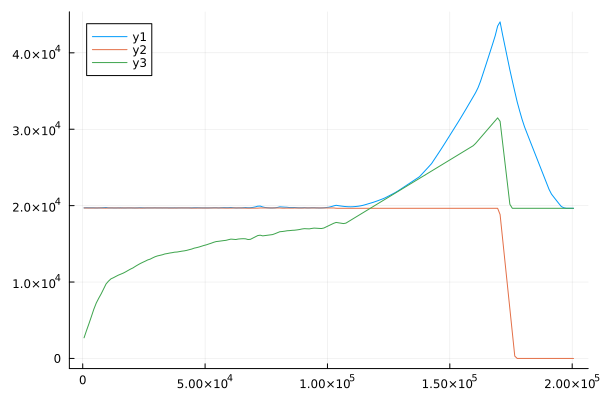

In [26]:
model=model1
K=3
node=model.nodes[K]
ind=539:1000:200710
TV=[SDDP.compute_TV(node, Dict(Symbol("storedEnergy[1]")=>1.0*i)) for i in ind]
TVk=[SDDP.compute_approx_TV(node.value_function, Dict(Symbol("storedEnergy[1]")=>1.0*i)) for i in ind]
V=[[SDDP.compute_V(model.nodes[k].value_function, Dict(Symbol("storedEnergy[1]")=>1.0*i)) for i in ind] for k in K:K]
TVjensen=[SDDP.compute_jensen_TV(node, Dict(Symbol("storedEnergy[1]")=>1.0*i)) for i in ind]

println(findmin(TV-V[1]))

plot(ind, V, label="V_k")
plot!(ind, TV, label="T(V_k)")
plot!(ind, TVk, label="T(V_k)")
plot!(ind, TVjensen, label="T(V_k)")

plot(ind, TV-V[1])
plot!(ind, TVk-V[1])
plot!(ind, TVjensen-V[1])
# TV[end]-TV[end-1], V[1][end]-V[1][end-1]

In [37]:
TV[150]-TV[151]

11313.720000000088

In [518]:
model1[11].value_function.heuristic_state

Dict{Symbol, Float64} with 1 entry:
  Symbol("storedEnergy[1]") => 0.0

In [519]:
model1[11].value_function.cut_V[end]

SDDP.Cut2(233655.2131123201, Dict(Symbol("storedEnergy[1]") => -7.31392), [11930.125828875229], V + 7.31392 storedEnergy[1]_out ≥ 233655.2131123201, 7.31392 storedEnergy[1]_out + V_10 ≥ 233655.2131123201, Dict(Symbol("storedEnergy[1]") => 31946.645999999757))

In [306]:
println(model0[2].subproblem)
JuMP.optimize!(model0[2].subproblem)
println("optimal value: ", JuMP.objective_value(model0[1].subproblem)-0.8*49297.55828537015)
value.(model0[2].subproblem[:storedEnergy])

Min 11.427999999999999 deficit[1,1] + 0.8 V_2
Subject to
 hydroGeneration[1] + deficit[1,1] = 46611
 -storedEnergy[1]_in + storedEnergy[1]_out + spillEnergy[1] + hydroGeneration[1] - inflow[1] = 0
 V_2 ≥ 0
 V_2 ≥ 28929.52487999994
 V_2 ≥ 28929.52487999994
 V_2 ≥ 28929.52487999994
 V_2 ≥ 28929.52487999994
 V_2 ≥ 43455.23195673291
 V_2 ≥ 44453.43094626641
 V_2 ≥ 44453.43094626641
 V_2 ≥ 44522.02665850555
 V_2 ≥ 44526.74051995696
 V_2 ≥ 44526.74051995696
 V_2 ≥ 44527.06445404931
 V_2 ≥ 44527.08671463063
 V_2 ≥ 44527.08671463063
 V_2 ≥ 44527.088244366125
 V_2 ≥ 44527.08834948875
 V_2 ≥ 44527.08834948875
 V_2 ≥ 44527.08835671273
 V_2 ≥ 44527.08835671273
 V_2 ≥ 44527.08835671273
 V_2 ≥ 44527.08835671273
 V_2 ≥ 44527.08835671273
 V_2 ≥ 44527.08835671273
 V_2 ≥ 44527.08835671273
 V_2 ≥ 44527.08835671273
 V_2 ≥ 44527.08835671273
 V_2 ≥ 44527.08835671273
 V_2 ≥ 44527.08835671273
 V_2 ≥ 44527.08835671273
 V_2 ≥ 44527.08835671273
 V_2 ≥ 44527.08835671273
 V_2 ≥ 44527.08835671273
 V_2 ≥ 44527.08835

1-element Vector{SDDP.State{Float64}}:
 SDDP.State{Float64}(0.0, 41074.009999999995)

In [290]:
println(model1[1].subproblem)
JuMP.optimize!(model1[1].subproblem)
println("optimal value: ", JuMP.objective_value(model1[1].subproblem))
value.(model1[1].subproblem[:storedEnergy])

Min 11.427999999999999 deficit[1,1] + 0.8 V_1
Subject to
 hydroGeneration[1] + deficit[1,1] = 45515
 -storedEnergy[1]_in + storedEnergy[1]_out + spillEnergy[1] + hydroGeneration[1] - inflow[1] = 0
 V_1 ≥ 0
 V_1 ≥ 0
 V_1 ≥ 0
 V_1 ≥ 0
 V_1 ≥ 0
 V_1 ≥ 0
 V_1 ≥ 0
 V_1 ≥ 0
 V_1 ≥ 0
 V_1 ≥ 0
 V_1 ≥ 0
 V_1 ≥ 0
 V_1 ≥ 0
 V_1 ≥ 0
 V_1 ≥ 0
 V_1 ≥ 0
 V_1 ≥ 0
 V_1 ≥ 0
 V_1 ≥ 0
 V_1 ≥ 0
 V_1 ≥ 0
 V_1 ≥ 0
 V_1 ≥ 0
 V_1 ≥ 0
 V_1 ≥ 0
 V_1 ≥ 0
 V_1 ≥ 0
 V_1 ≥ 0
 V_1 ≥ 0
 V_1 ≥ 0
 V_1 ≥ 0
 V_1 ≥ 0
 V_1 ≥ 0
 V_1 ≥ 0
 V_1 ≥ 0
 V_1 ≥ 0
 V_1 ≥ 0
 V_1 ≥ 0
 V_1 ≥ 0
 V_1 ≥ 0
 V_1 ≥ 0
 storedEnergy[1]_in = 59419.3
 inflow[1] = 39717.564
 storedEnergy[1]_out ≥ 0
 spillEnergy[1] ≥ 0
 hydroGeneration[1] ≥ 0
 deficit[1,1] ≥ 0
 V_1 ≥ 0
 storedEnergy[1]_out ≤ 200717.6
 hydroGeneration[1] ≤ 45414.3
 deficit[1,1] ≤ 227575

optimal value: 1150.7995999999666


1-element Vector{SDDP.State{Float64}}:
 SDDP.State{Float64}(59419.3, 53722.564)

In [42]:
k=1
node3=model1.nodes[10]


xk=Dict(Symbol("storedEnergy[1]") => 100000.0) #node3.value_function.heuristic_state
_ , gh_k = SDDP.compute_V2(node3.value_function, xk)
println(gh_k)
model_TV = node3.value_function.model_TV
primal_obj = JuMP.objective_function(model_TV)
JuMP.set_objective_function(
    model_TV,
    @expression(model_TV, primal_obj - sum(gh_k[name] * state for (name, state) in node3.value_function.states_TV)),
)
JuMP.optimize!(model_TV)
xk1=Dict(i => value.(x) for (i,x) in node3.value_function.states_TV)
JuMP.set_objective_function(
    model_TV,
    @expression(model_TV, primal_obj),
)
println((xk1, xk))
TVxk1, coeff=SDDP.compute_TV2(node3, xk1)
TVxk1 - SDDP.compute_V(node3.value_function, xk1)

Dict(Symbol("storedEnergy[1]") => -11.422286000000001)
(Dict(Symbol("storedEnergy[1]") => 200717.6), Dict(Symbol("storedEnergy[1]") => 100000.0))


167651.2682289578